

> Principal Component Analysis



#---- Principle component Analysis ----#

In [ ]:
# principle component analysis is all about preserving Variance as much as we can , because variance is informative

# Variance is how far a varible value is from mean of dataset, variables are features .. so we reduce the features by preserving variance

# eigen matrix (which has eigen values and eigen vectors) multiplied by X raw features = to get new features

# new features are not the subset of raw features

# lets understand by using iris dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = iris.iloc[:, 0:4]
print(X)
Y = iris.iloc[:, 4]
print(Y)

# Standardization , where mean = 0 and sd =1
iris_std = (X-X.mean())/ X.std()
print(iris_std)

# concatenate Y
iris_std = pd.concat([iris_std, Y], axis=1)
print(iris_std)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal

In [ ]:
print(iris.describe())
print(iris_std.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
       sepal_length   sepal_width  petal_length   petal_width
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -5.684342e-16 -7.815970e-16 -2.842171e-16 -3.789561e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.863780e+00 -2.425820e+00 -1.562342e+00 -1.442245e+00
25%   -8.976739e-01 -5.903951e-01 -1.222456e+00 -1.179859e+00
50%   -5.233076e-02 -1.315388e-01  3.353541e-01  1.320673e-01
75%    6.722490e-01  5.567

Plots showed distribution and scatter preserved , No change , where as data standardized at center zero
---------------------------------------------------------------------------------------------------------
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d5bf2ae50>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, ' standardized iris scatter plot')

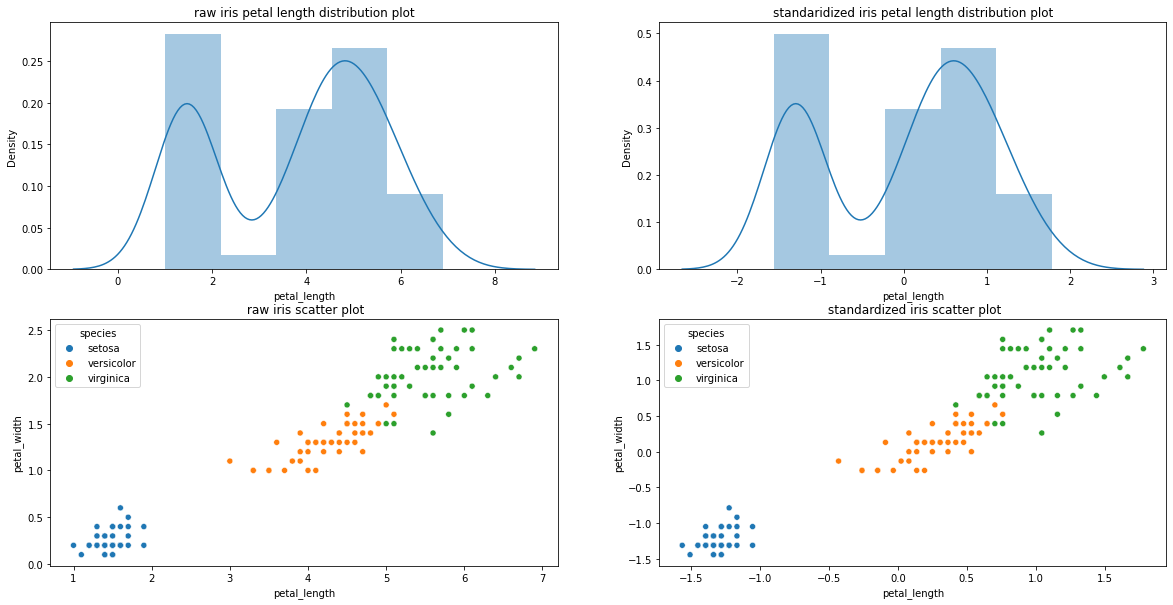

In [ ]:
# Lets see by standaridization whether we preserved the information or variance by plotting

print("Plots showed distribution and scatter preserved , No change , where as data standardized at center zero" )
print("---------------------------------------------------------------------------------------------------------")
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (20, 10))
print(axes)

axes_0 = sns.distplot(iris['petal_length'], hist= True, kde= True, ax = axes[0,0])
axes_0.set_title("raw iris petal length distribution plot")

axes_1 = sns.distplot(iris_std['petal_length'], hist= True, kde= True, ax= axes[0,1])
axes_1.set_title("standaridized iris petal length distribution plot")

axes_2 = sns.scatterplot(x= "petal_length", y= "petal_width" , data= iris, hue= 'species', ax = axes[1,0])
axes_2.set_title(" raw iris scatter plot")

axes_2 = sns.scatterplot(x= "petal_length", y= "petal_width", data= iris_std, hue= 'species', ax = axes[1,1])
axes_2.set_title(" standardized iris scatter plot")



In [ ]:
# Now data is standardized , next we can perform 
# ---- preparing correlation matrix using numpy 
#------ finding eigen vector and eigen values using matrix linalg.eig
# ---- 

X_std =  iris_std.iloc[:, 0:4]
print(X_std)

y = iris_std.iloc[:,4]
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0       -0.897674     1.015602     -1.335752    -1.311052
1       -1.139200    -0.131539     -1.335752    -1.311052
2       -1.380727     0.327318     -1.392399    -1.311052
3       -1.501490     0.097889     -1.279104    -1.311052
4       -1.018437     1.245030     -1.335752    -1.311052
..            ...          ...           ...          ...
145      1.034539    -0.131539      0.816859     1.443994
146      0.551486    -1.278680      0.703564     0.919223
147      0.793012    -0.131539      0.816859     1.050416
148      0.430722     0.786174      0.930154     1.443994
149      0.068433    -0.131539      0.760211     0.788031

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components= 2, random_state= 100)
PCs = sklearn_pca.fit_transform(X_std)
print(PCs.shape)
print(X_std.shape)
print(PCs)

(150, 2)
(150, 4)
[[-2.25714118  0.47842383]
 [-2.07401302 -0.67188269]
 [-2.35633511 -0.34076642]
 [-2.29170679 -0.59539986]
 [-2.3818627   0.64467566]
 [-2.06870061  1.4842053 ]
 [-2.43586845  0.04748512]
 [-2.22539189  0.222403  ]
 [-2.32684533 -1.1116037 ]
 [-2.17703491 -0.46744757]
 [-2.15907699  1.04020587]
 [-2.31836413  0.132634  ]
 [-2.2110437  -0.72624318]
 [-2.62430902 -0.95829635]
 [-2.19139921  1.85384655]
 [-2.25466121  2.67731523]
 [-2.20021676  1.47865573]
 [-2.18303613  0.48720613]
 [-1.89223284  1.40032757]
 [-2.33554476  1.1240836 ]
 [-1.90793125  0.40749058]
 [-2.19964383  0.92103587]
 [-2.76508142  0.4568133 ]
 [-1.81259716  0.08527285]
 [-2.21972701  0.13679618]
 [-1.9453293  -0.62352971]
 [-2.04430277  0.24135499]
 [-2.1613365   0.52538942]
 [-2.13241965  0.312172  ]
 [-2.25769799 -0.33660425]
 [-2.13297647 -0.50285608]
 [-1.82547925  0.42228039]
 [-2.60621687  1.78758727]
 [-2.43800983  2.1435468 ]
 [-2.10292986 -0.45866527]
 [-2.20043723 -0.20541922]
 [-2.03831

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


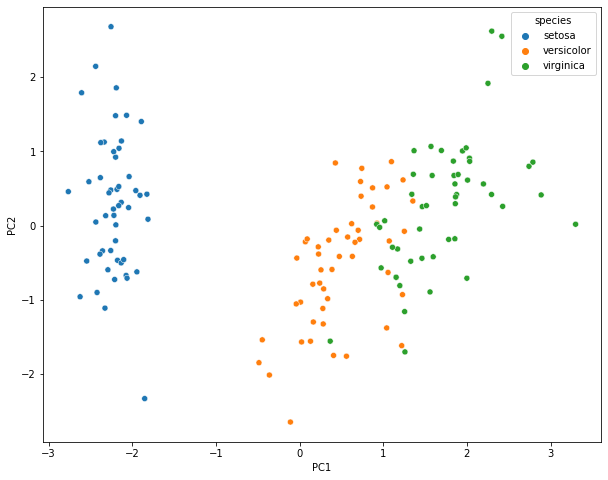

In [ ]:
iris_transform_df = pd.DataFrame(PCs, columns=("PC1", "PC2"))
iris_transform_df = pd.concat([iris_transform_df, y], axis = 1)

iris_transform_df.head()


fig, ax = plt.subplots(figsize = (10,8))

ax_0 = sns.scatterplot("PC1", "PC2", data= iris_transform_df, hue= "species")
plt.show()